In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train[0].shape

(32, 32, 3)

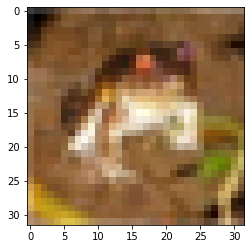

In [4]:
plt.imshow(X_train[0])

In [5]:
#Pre-processing

X_train[0].max()

255

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
# converting the values into categorical

from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [10]:
# The total number of values in the color image

32*32*3

3072

In [11]:
# Creating a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [13]:
# Adding early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

model.fit(X_train,y_cat_train,epochs=15,
         validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.5217 - accuracy: 0.4485 - val_loss: 1.3658 - val_accuracy: 0.5040
Epoch 2/15
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.2103 - accuracy: 0.5727 - val_loss: 1.1500 - val_accuracy: 0.5968
Epoch 3/15
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.0685 - accuracy: 0.6272 - val_loss: 1.0439 - val_accuracy: 0.6321
Epoch 4/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9617 - accuracy: 0.6618 - val_loss: 0.9991 - val_accuracy: 0.6497
Epoch 5/15
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8867 - accuracy: 0.6905 - val_loss: 0.9801 - val_accuracy: 0.6611
Epoch 6/15
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.8161 - accuracy: 0.7138 - val_loss: 0.9873 - val_accuracy: 0.6628
Epoch 7/15
50000/50000 [==============================] 

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.521704,0.44850,1.365785,0.5040
1,1.210262,0.57272,1.149957,0.5968
2,1.068467,0.62720,1.043948,0.6321
3,0.961680,0.66184,0.999110,0.6497
4,0.886694,0.69050,0.980111,0.6611
5,0.816131,0.71384,0.987348,0.6628
6,0.752002,0.73750,0.952669,0.6791
7,0.693305,0.75856,0.993419,0.6740
8,0.644035,0.77448,0.987434,0.6783


In [21]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

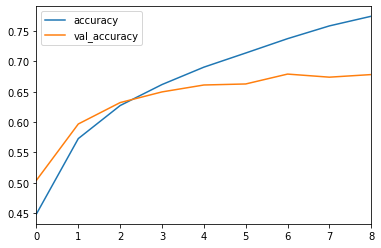

In [23]:
metrics[['accuracy','val_accuracy']].plot()

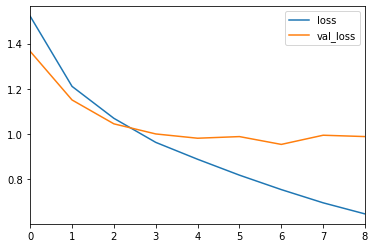

In [24]:
metrics[['loss','val_loss']].plot()

In [25]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9874343440055847, 0.6783]

In [28]:
# Classification_Report & Confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

pred = model.predict_classes(X_test)
print("classification_report :",classification_report(y_test,pred))


pred = model.predict_classes(X_test)
print("confusion_matrix :",confusion_matrix(y_test,pred))

classification_report :               precision    recall  f1-score   support

           0       0.64      0.80      0.71      1000
           1       0.82      0.78      0.80      1000
           2       0.64      0.48      0.55      1000
           3       0.46      0.49      0.47      1000
           4       0.62      0.65      0.63      1000
           5       0.66      0.48      0.56      1000
           6       0.70      0.80      0.75      1000
           7       0.73      0.74      0.73      1000
           8       0.76      0.80      0.78      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

confusion_matrix : [[796  19  32  19  12   2  13   6  69  32]
 [ 50 775   9  10   5   2  13   1  48  87]
 [ 92   8 482 105 106  46  91  35  19  16]
 [ 46  13  48 488  93 114  85  59  27  27]
 [ 35   4  66  74 652  19 

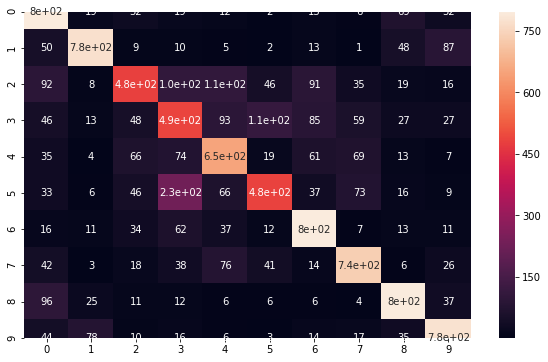

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

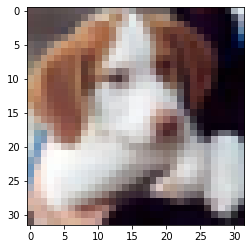

In [34]:
my_img = X_test[16]
plt.imshow(my_img)

In [35]:
y_test[16]

array([5], dtype=uint8)

In [36]:
# what 1 img, 32*32 pixels, 3 color channels
model.predict_classes(my_img.reshape(1,32,32,3))

array([5], dtype=int64)